In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
import tensorflow as tf
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, activations, models, preprocessing, utils
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from nltk.tokenize import word_tokenize, sent_tokenize
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import nltk
import sqlite3
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Part 1: Phân tích bộ phân loại

In [ ]:
classification_data = pd.read_csv("/content/classification.csv")
classification_data.head()

,Sentence,Tag
0,what is the digital storage capacity of the re...,Informations tags
1,can i pay with a combination of cash and card,Non-Informations tags
2,what languages does your company operate in,Non-Informations tags
3,where can i see a live demo of your product,Non-Informations tags
4,what is the flash storage size of the samsung ...,Informations tags


In [ ]:
label_mapping ={
    'Informations tags':1,
    'Non-Informations tags':0
}

In [ ]:
classification_data['Tag'] = classification_data['Tag'].map(label_mapping)

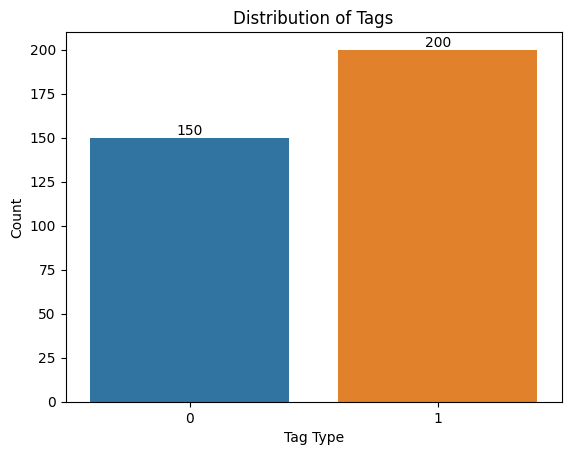

In [ ]:
ax = sns.countplot(x='Tag', data=classification_data)
plt.title("Distribution of Tags")
plt.xlabel("Tag Type")
plt.ylabel("Count")

# Annotating the count on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
model_1 = tf.keras.models.load_model("/content/classification.h5",compile=False)
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 18)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 18, 30)            86550     
                                                                 
 lstm_3 (LSTM)               (None, 16)                3008      
                                                                 
 FC1 (Dense)                 (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 out_layer (Dense)           (None, 1)                 9         
                                                                 
 activation_1 (Activation)   (None, 1)                 0   

In [ ]:
X = classification_data.Sentence
Y = classification_data.Tag
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
classification_data.sample(10)

,Sentence,Tag
57,thanks,0
270,what is the display area of the samsung galaxy...,1
295,how much is the going rate for a xiaomi redmi ...,1
307,"for the iphone 11 64gb, what would the price be",1
9,what is the storage capacity of the samsung ga...,1
12,what is the non-volatile memory amount in the ...,1
148,what is the price quotation for a xiaomi redmi...,1
104,could you send me an invoice for the oppo find...,1
269,what is the physical size of the xiaomi redmi ...,1
346,what is the physical size of the samsung galax...,1


In [ ]:
chatbot_data= pd.read_csv('/content/chatbot_dataset_5.csv')
chatbot_data['cauhoi'] = chatbot_data['cauhoi'].astype(str)
chatbot_data['traloi'] = chatbot_data['traloi'].astype(str)

In [ ]:
all_texts = classification_data['Sentence'].tolist() + chatbot_data['cauhoi'].tolist() + chatbot_data['traloi'].tolist()

In [ ]:
max_len = 18
tokenizer = Tokenizer(oov_token='OOV')
tokenizer.fit_on_texts(all_texts)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
# print(X_train_sequences)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')

In [ ]:
Y_pred=model_1.predict(X_test_padded)
y_pred_binary = (Y_pred > 0.5).astype(int)
report = classification_report(Y_test, y_pred_binary)
print(report)

2/2 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.96      1.00      0.98        22

    accuracy                           0.97        35
   macro avg       0.98      0.96      0.97        35
weighted avg       0.97      0.97      0.97        35



Text(0.5, 1.0, 'Confusion Matrix')

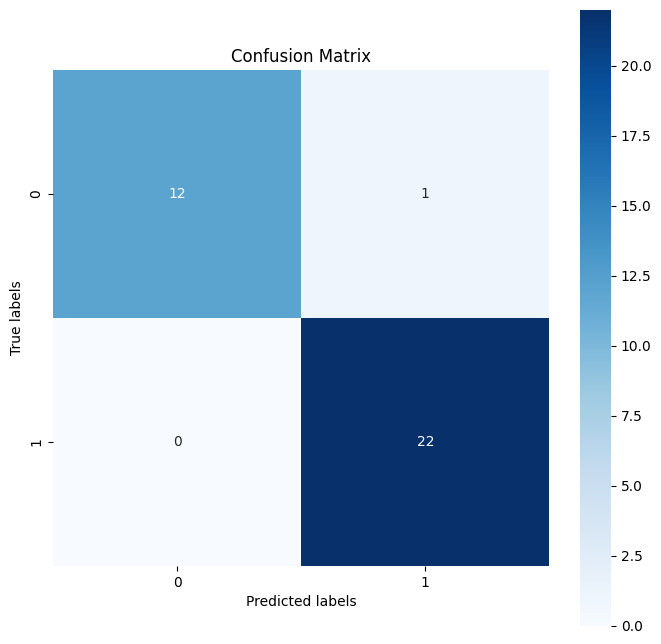

In [ ]:
cm = confusion_matrix(Y_test, y_pred_binary)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, ax=ax, square=True, cmap='Blues', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Part 2: chatbot data

<ipython-input-70-291a9f3132e0>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




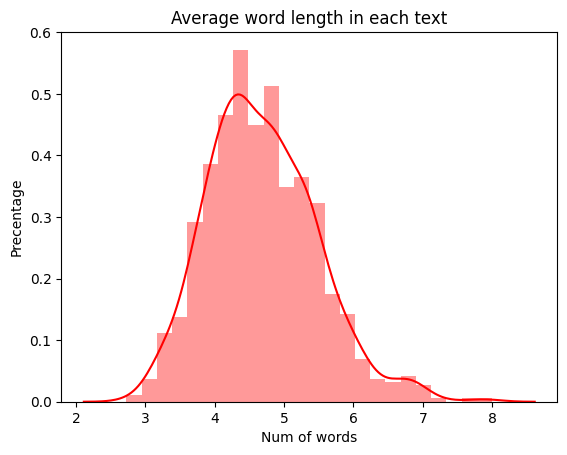

In [ ]:
word=chatbot_data['cauhoi'].str.split().apply(lambda x : [len(i) for i in x])
word = word.map(lambda x: np.mean(x))
sns.distplot(word,color='red')
plt.title("Average word length in each text")
plt.xlabel("Num of words")
plt.ylabel("Precentage")
plt.show()

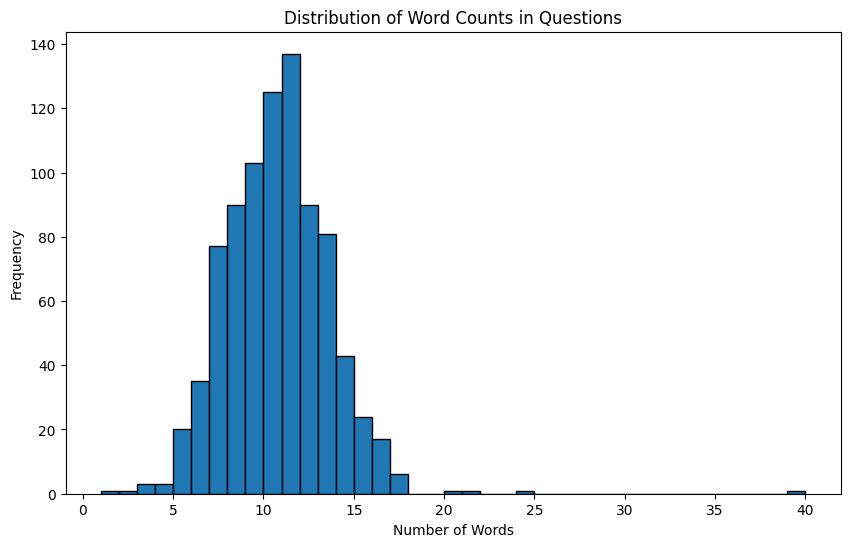

In [ ]:
def word_count(text):
    return len(text.split())

# Apply this function to each question
chatbot_data['Word_Count'] = chatbot_data['cauhoi'].apply(word_count)

# Now plot the data
plt.figure(figsize=(10, 6))  # You can adjust the size of the figure
plt.hist(chatbot_data['Word_Count'], bins=range(min(chatbot_data['Word_Count']), max(chatbot_data['Word_Count']) + 1, 1), edgecolor='black')
plt.title('Distribution of Word Counts in Questions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()